**Problem**: Google slides automatically resizes images when placed into a slide. There does not seem to be a way to disable this "feature".

**Solution**: Write methods to produce plots individually, or package them into a single figure object.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
# Settings for the individual figures
FIG_HIGH = 8
FIG_WIDE = 8

TITLE_SIZE = 18
LABEL_SIZE = 14
TICKLABEL_SIZE = 12
TICK_SIZE = 10
ANNOT_SIZE = 8

In [176]:
def get_data() -> np.ndarray:
    '''
    Create some random data for testing
    '''
    data = np.random.random(size=(8,8)) * 100
    np.fill_diagonal(data, np.nan)
    return np.round(np.flip(data, axis=1))    

def make_annots(wins, 
                ties
               ):
    annots = []
    for i in range(8):
        row = []
        for j in range(8):
            if np.isnan(wins[i,j]):
                row.append('')
            else:
                row.append(f'{str(int(wins[i,j]))} ({str(int(ties[i,j]))})')
                #annots[i,j] = f'{str(wins[i,j])}({str(ties[i,j])})'
        annots.append(row)
            #print(f'{str(wins[i,j])}({str(ties[i,j])})')
    return np.array(annots)
    
def make_heatmap(data: np.ndarray,
                 annots: np.ndarray,
                 ax: plt.Axes = None,
                 hide_yticks: bool = False,
                 title: str = None,
                ) -> [plt.Figure, plt.Axes]:
    '''
    If ax is None, create a new figure.
    Otherwise, add the heatmap to the provided ax.
    '''

    # seqs = [f'{n:b}'.zfill(3) for n in range(8)]
    # seqs = ['000', '001', '010', '011', '100', '101', '110', '111']
    seqs = ['BBB', 'BBR', 'BRB', 'BRR', 'RBB', 'RBR', 'RRB', 'RRR']
    
    settings = {
        'vmin': 0,
        'vmax': 100,
        'linewidth': 0.01,
        'cmap': 'Blues',
        'cbar': False,
        'annot': annots,
        'fmt': ''
    }

    if ax is None:
        # Create a new figure
        fig, ax = plt.subplots(1, 1, figsize=(FIG_WIDE, FIG_HIGH))
    else:
        # Get the parent figure
        fig = ax.get_figure()

    sns.heatmap(data=data, ax=ax, **settings)

    ax.set_xticklabels(seqs, fontsize=TICKLABEL_SIZE)
    ax.set_yticklabels(seqs[::-1], fontsize=TICKLABEL_SIZE)
    ax.set_title(title, fontsize=TITLE_SIZE)
    ax.set_facecolor('lightgray')
    
    if hide_yticks:
        ax.set_yticks([])
    
    return fig, ax

def make_heatmap_package(cards: np.ndarray,
                         cards_ties: np.ndarray,
                         tricks: np.ndarray,
                         tricks_ties: np.ndarray,
                         n
                        ) -> [plt.Figure, plt.Axes]:
    
    '''
    Create a 1x2 grid of heatmaps based on the given data
    '''

    # Adjust as desired. This would be another group of settings we should all agree on!
    # For this example, I'm just reducing the spacing between them
    gridspec_kw = {'wspace': 0.05,
                   
                  }

    fig, ax = plt.subplots(1, 2, 
                           figsize=(FIG_WIDE*2, FIG_HIGH), 
                           #sharey=True, 
                           gridspec_kw=gridspec_kw)

    # Left heatmap
    cards_annots = make_annots(cards, cards_ties)
    make_heatmap(cards, cards_annots, ax[0], 
                 title=f'My Chance of Winning by Cards\n(from {n} Random Decks)',
                )
    ax[0].set_xlabel('Me', fontsize=LABEL_SIZE)
    ax[0].set_ylabel('Opponent', fontsize=LABEL_SIZE)

    # Right heatmap
    tricks_annots = make_annots(tricks, tricks_ties)
    make_heatmap(tricks, tricks_annots, ax[1], 
                 title=f'My Chance of Winning by Tricks\n(from {n} Random Decks)',
                 hide_yticks=True)
    ax[1].set_xlabel('Me', fontsize=LABEL_SIZE)

    # Add custom colorbar
    cbar_ax = fig.add_axes([.92, 0.11, 0.02, .77])
    cb = fig.colorbar(ax[1].collections[0], cax=cbar_ax, format='%.0f%%')
    cb.outline.set_linewidth(.2)

    fig.suptitle('Cell text are formatted as follows: Chance of Win (Chance of Tie)', x=0.3, y=0.01) # Caption
    
    return fig, ax

In [177]:
# Make some data
cards = get_data()
cards_ties = get_data()
tricks = get_data()
tricks_ties = get_data()

In [178]:
annots = make_annots(cards, cards_ties)
annots.shape

(8, 8)

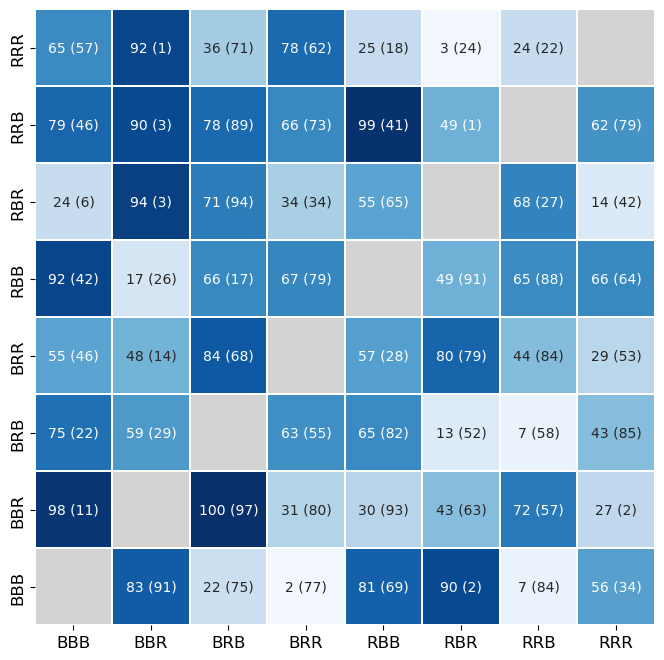

In [179]:
# Create a single heatmap
fig1, ax1 = make_heatmap(cards, annots)
#fig1.savefig('single_heatmap.png', bbox_inches='tight')

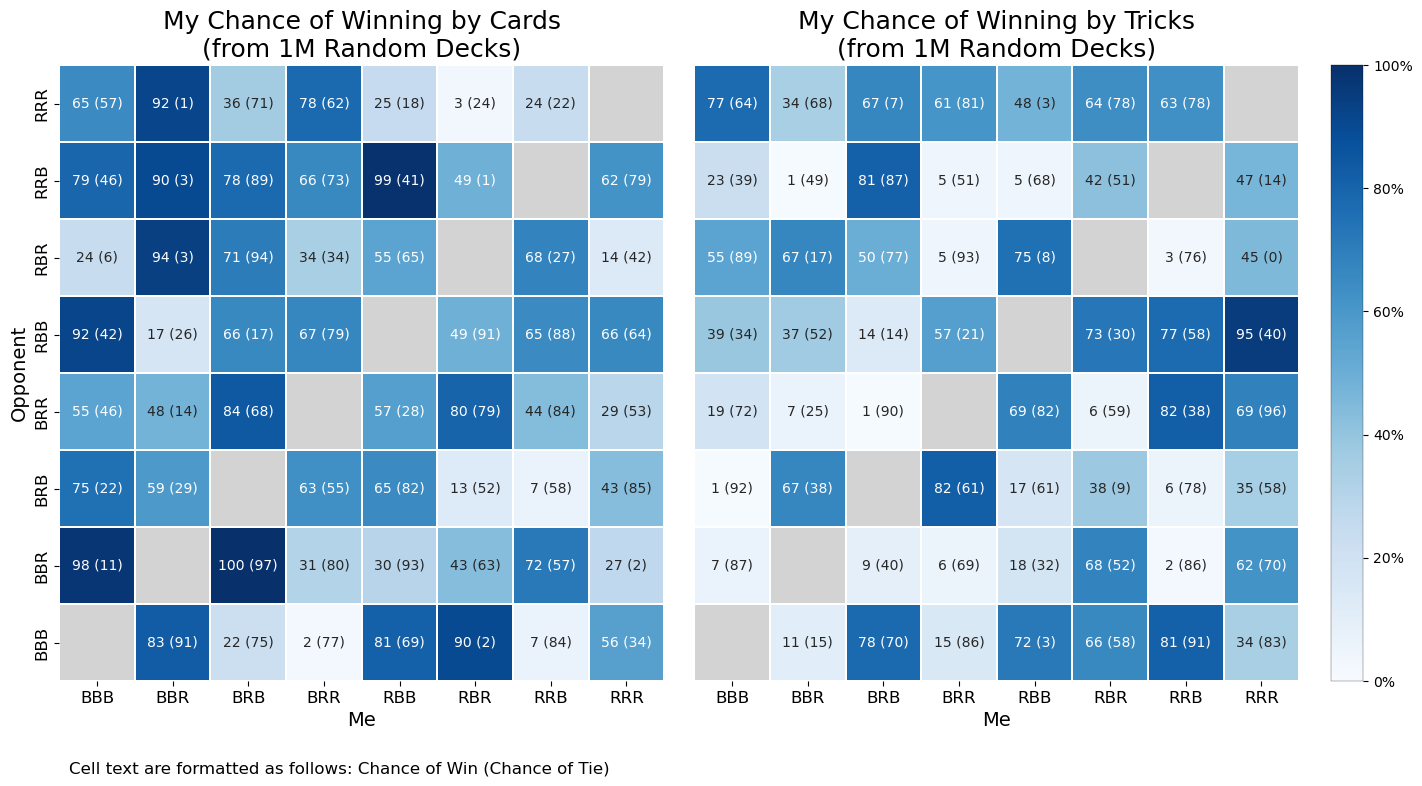

In [181]:
# Create a single figure with both heatmaps
fig, ax = make_heatmap_package(cards, cards_ties, tricks, tricks_ties, '1M')
# fig.savefig('test/slides_heatmaps.png', bbox_inches='tight', dpi=300)